<a href="https://colab.research.google.com/github/RodrigoBarbosaa/Flight_Delay_Prediction/blob/main/voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight delay analysis**

In this project, we intend to use data analytics to find the correlation existent between flight delays (specific to 2021's USA flight data) and multiple factors, especially during high season for travelling, where there is an increased demand for flight booking. This is part of the Introdutcion to Data Science (Advanced Topics in Data and Information Management) course, by Luciano Barbosa at CIn, Federal University of Pernambuco.

## Who are we?
[Mariana Amorim](https://github.com/mrbsa) and [Rodrigo Barbosa](https://github.com/RodrigoBarbosaa), students of Information Systems @ Centro de Informática, UFPE, and data enthusiasts.

## Sources

The database is a courtesy of Rob Mulla @ Kaggle. You can find it [here](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022/data?select=readme.md).

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando o Dataset e Bibliotecas

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import zscore

In [9]:
pip install scikit-learn

In [10]:
flights = pd.read_csv("/content/drive/MyDrive/Combined_Flights_2021 2.csv", encoding = "ISO-8859-1")

In [11]:
flights.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CRSDepTime,DepTime,CRSElapsedTime,ActualElapsedTime,CRSArrTime,ArrTime
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,0.0,False,724,714.0,79.0,64.0,843,818.0
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,0.0,False,922,917.0,78.0,74.0,1040,1031.0
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,0.0,False,1330,1321.0,180.0,160.0,1530,1501.0
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,0.0,False,1645,1636.0,145.0,146.0,2010,2002.0
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,0.0,False,1844,1838.0,101.0,85.0,1925,1903.0


In [12]:
print(flights.columns)

Index(['Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin',
       'OriginCityName', 'Dest', 'DestCityName', 'DepDelayMinutes',
       'ArrDelayMinutes', 'Cancelled', 'CRSDepTime', 'DepTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime'],
      dtype='object')


# Filtrando o Dataset para análise

Como queremos trabalhar com a probabilidade de um voo atrasar na saída (Depature) e fornecer esse tempo de atraso, decidimos filtrar apenas as colunas envolvidas para análise. Nesse caso, são: **'Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin','OriginCityName', 'DestCityName', 'Dest', 'DepDelayMinutes', 'Cancelled' **

In [60]:
depature_db = flights[['Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'OriginCityName', 'Dest', 'DestCityName', 'DepDelayMinutes', 'Cancelled' ]]

In [61]:
depature_db.head(10)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,Cancelled
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,False
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,False
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,False
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,False
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,False
5,SkyWest Airlines Inc.,2021-03-03,3,3,3,ORD,"Chicago, IL",BNA,"Nashville, TN",0.0,False
6,SkyWest Airlines Inc.,2021-03-03,3,3,3,PSP,"Palm Springs, CA",PHX,"Phoenix, AZ",0.0,False
7,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",YUM,"Yuma, AZ",0.0,False
8,SkyWest Airlines Inc.,2021-03-03,3,3,3,LBB,"Lubbock, TX",PHX,"Phoenix, AZ",0.0,False
9,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",DRO,"Durango, CO",0.0,False


In [62]:
depature_db.describe()

,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,6.311871e+06,6.311871e+06,6.311871e+06,6.203458e+06
mean,6.969905e+00,1.579259e+01,4.013676e+00,1.276132e+01
std,3.300914e+00,8.786535e+00,2.006264e+00,4.736319e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,1.000000e+01,2.300000e+01,6.000000e+00,6.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,3.095000e+03


In [63]:
# existem informações faltantes em DepDelayMinutes

In [64]:
depature_db.isnull().sum()

Airline                 0
FlightDate              0
Month                   0
DayofMonth              0
DayOfWeek               0
Origin                  0
OriginCityName          0
Dest                    0
DestCityName            0
DepDelayMinutes    108413
Cancelled               0
dtype: int64

In [65]:
# encontrar motivo das informações serem nulas

In [66]:
depature_db.loc[pd.isnull(depature_db["DepDelayMinutes"])]

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,Cancelled
93,SkyWest Airlines Inc.,2021-03-18,3,18,4,MKE,"Milwaukee, WI",DFW,"Dallas/Fort Worth, TX",NaN,True
94,SkyWest Airlines Inc.,2021-03-18,3,18,4,DTW,"Detroit, MI",ORD,"Chicago, IL",NaN,True
95,SkyWest Airlines Inc.,2021-03-18,3,18,4,MDT,"Harrisburg, PA",ORD,"Chicago, IL",NaN,True
98,SkyWest Airlines Inc.,2021-03-18,3,18,4,TVC,"Traverse City, MI",ORD,"Chicago, IL",NaN,True
99,SkyWest Airlines Inc.,2021-03-18,3,18,4,ORD,"Chicago, IL",MSP,"Minneapolis, MN",NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
6310286,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,BTR,"Baton Rouge, LA",IAH,"Houston, TX",NaN,True
6310305,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,DEN,"Denver, CO",SGF,"Springfield, MO",NaN,True
6310313,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,IAH,"Houston, TX",CLL,"College Station/Bryan, TX",NaN,True
6310315,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,IAH,"Houston, TX",AEX,"Alexandria, LA",NaN,True


Após o filtro de informações nulas em "DepDelayMinutes", percebemos que os voos cancelados não possuem tempo de atraso, e a informação encontra-se como nula.

Na nossa análise, não queremos abordar voos cancelados. Apenas a previsão de atraso. Dessa maneira, decidimos excluir os voos que foram cancelados, igualando a quantidade dos dados.

In [67]:
df_voos_realizados = depature_db[depature_db['Cancelled'] != True]
df_voos_realizados .drop('Cancelled', axis=1, inplace=True);

<ipython-input-67-05758a55f9bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados .drop('Cancelled', axis=1, inplace=True);


In [68]:
df_voos_realizados.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0


In [69]:
df_voos_realizados.shape[0]

6200853

In [70]:
df_voos_realizados.describe()

,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,6.200853e+06,6.200853e+06,6.200853e+06,6.200853e+06
mean,6.971930e+00,1.578955e+01,4.014590e+00,1.273993e+01
std,3.297374e+00,8.786934e+00,2.003839e+00,4.729205e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,1.000000e+01,2.300000e+01,6.000000e+00,6.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,3.095000e+03


In [71]:
# Agora, todos os campos estão preenchidos

#Visualização de atraso dos voos realizados

In [ ]:
media = df_voos_realizados["DepDelayMinutes"].mean()
mediana = df_voos_realizados["DepDelayMinutes"].median()
dp = df_voos_realizados["DepDelayMinutes"].std()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio padrão: {dp}")

Média: 12.739927716396437
Mediana: 0.0
Desvio padrão: 47.29204685764864


Visualização da distribuição dos minutos de atraso

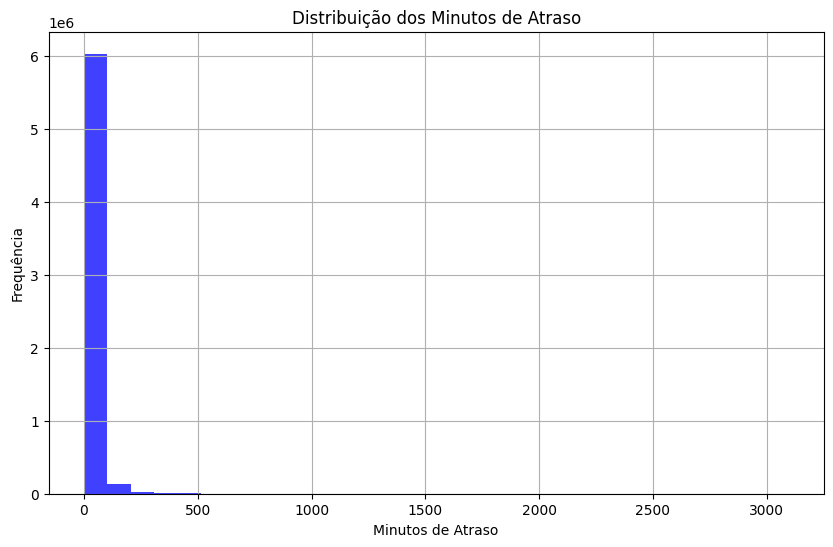

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_voos_realizados['DepDelayMinutes'], bins=30, alpha=0.75, color='blue')
plt.title('Distribuição dos Minutos de Atraso')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Visualização entre **voos atrasados** e **total de voos**

<ipython-input-106-0a17ed67820d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados['FlightDate'] = pd.to_datetime(df_voos_realizados['FlightDate']);
<ipython-input-106-0a17ed67820d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados['IsDelayed'] = df_voos_realizados['DepDelayMinutes'] > 0;


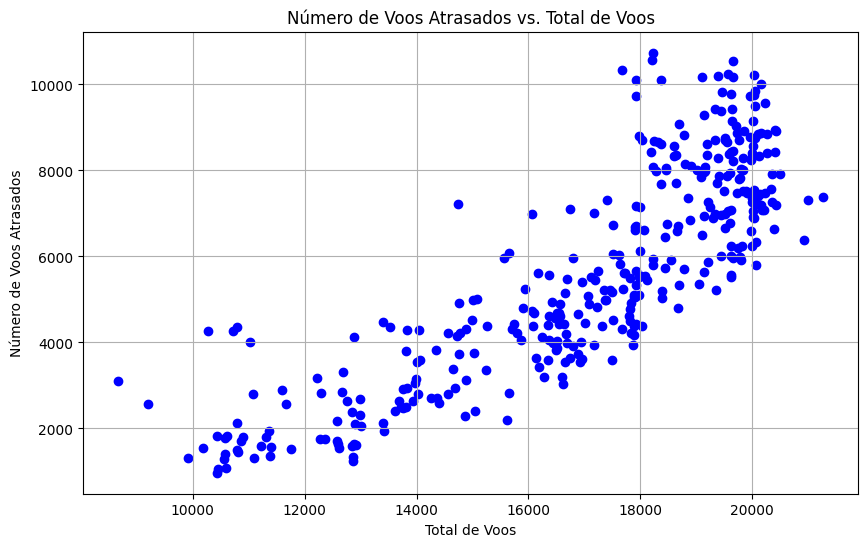

In [ ]:
df_voos_realizados['FlightDate'] = pd.to_datetime(df_voos_realizados['FlightDate']);
df_voos_realizados['IsDelayed'] = df_voos_realizados['DepDelayMinutes'] > 0;

# Agrupando e contando os voos por data
grouped = df_voos_realizados.groupby('FlightDate').agg(Total_Voos=('DepDelayMinutes', 'size'), Voos_Atrasados=('IsDelayed', 'sum')).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped['Total_Voos'], grouped['Voos_Atrasados'], color='blue')
plt.title('Número de Voos Atrasados vs. Total de Voos')
plt.xlabel('Total de Voos')
plt.ylabel('Número de Voos Atrasados')
plt.grid(True)
plt.show()

In [ ]:
#Com essa visualização, já é possivel identificar uma correlação positiva entre o número de voos e a quantidade de atrasos.

# Filtrando apenas voos atrasados

Seguindo, vamos analisar a proporção de atrasos com a quantidade de voos por mês. No primeiro passo, separamos o total de voos na variável "voos_mes", em seguida, iremos filtrar o dataset com apenas os voos atrasados, entender seus dados, e tirar a proporção (%atrasos/mês)

In [ ]:
voos_mes = df_voos_realizados.groupby('Month').size()

# Imprimir o resultado
print(voos_mes)

Month
1     375229
2     329969
3     461222
4     471375
5     517709
6     564583
7     605508
8     592760
9     560140
10    582759
11    573134
12    566465
dtype: int64


In [ ]:
# Filtrando Dataset apenas voos atrasados

In [ ]:
df = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] > 0]

In [ ]:
df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed
10,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",FAR,"Fargo, ND",2.0,True
12,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",8.0,True
36,SkyWest Airlines Inc.,2021-03-03,3,3,3,FSM,"Fort Smith, AR",DFW,"Dallas/Fort Worth, TX",22.0,True
37,SkyWest Airlines Inc.,2021-03-03,3,3,3,FLG,"Flagstaff, AZ",DFW,"Dallas/Fort Worth, TX",9.0,True
51,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",FLG,"Flagstaff, AZ",148.0,True


In [ ]:
df.shape[0]

2054071

# Entendendo os dados de atraso

Medidas de valor central:

In [ ]:
media = df["DepDelayMinutes"].mean()
mediana = df["DepDelayMinutes"].median()
print(f"Média: {media}")
print(f"Mediana: {mediana}")

Média: 38.4594393280466
Mediana: 16.0


Medidas de dispersão

In [ ]:
dp = df["DepDelayMinutes"].std()
variancia = df["DepDelayMinutes"].var()
print(f"Desvio padrão: {dp}")
print(f"Variância: {variancia}")

Desvio padrão: 75.911325021428
Variância: 5762.529266508881


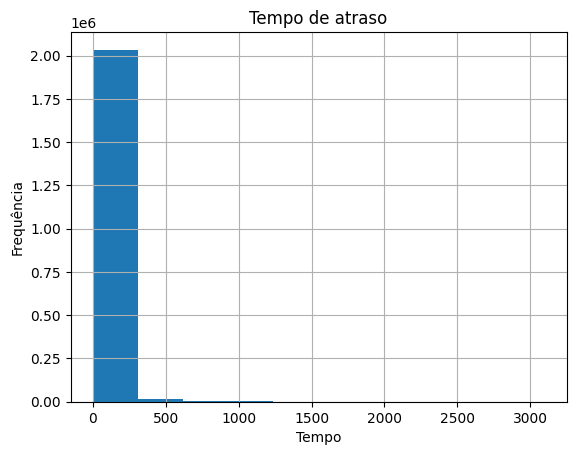

In [ ]:
df["DepDelayMinutes"].hist()

plt.title('Tempo de atraso')
plt.ylabel('Frequência')
plt.xlabel('Tempo')
plt.show()

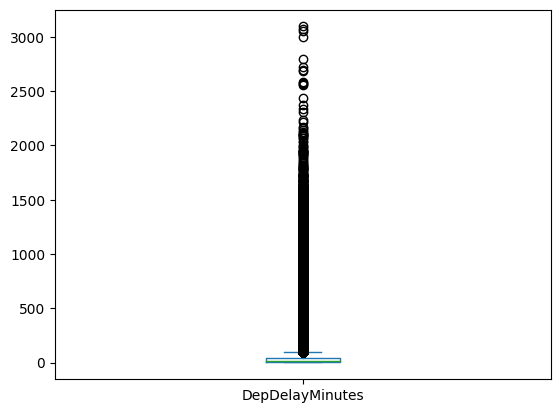

In [ ]:
df['DepDelayMinutes'].plot(kind="box")
plt.show()

Analisando o Histograma e o Boxplot, percebemos que o dataset dá a entender que voos remarcados são voos atrasados. Ex: voos com mais de 24h de atraso. Para nossa análise, decidimos considerar atrasos de até 8 horas (aproximadamente 500 minutos).

In [ ]:
# excluindo voos com mais de 500 minutos de atraso

In [ ]:
df = df[df['DepDelayMinutes'] <= 500]
df_voos_realizados = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] <= 500]

In [ ]:
# verificando o tempo de atraso máximo (é esperado 500)

df["DepDelayMinutes"].max()

500.0

Novo Boxplot

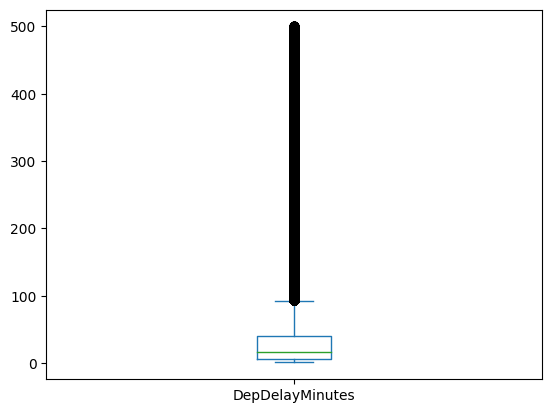

In [ ]:
df['DepDelayMinutes'].plot(kind="box")
plt.show()

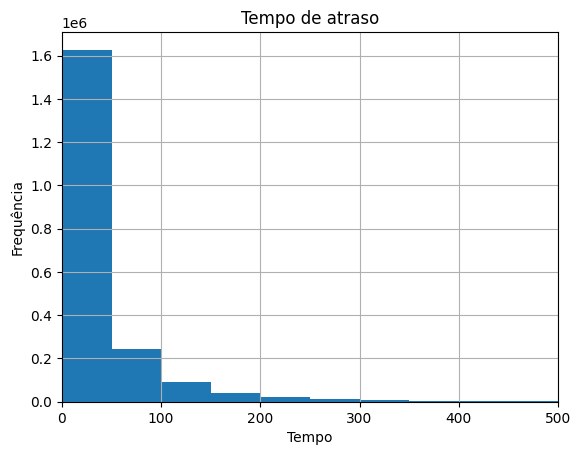

In [ ]:
df["DepDelayMinutes"].hist()
plt.xlim(0, 500)
plt.title('Tempo de atraso')
plt.ylabel('Frequência')
plt.xlabel('Tempo')
plt.show()

In [ ]:
# Analisando o dataset final de atraso após os filtros

In [ ]:
df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed
10,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",FAR,"Fargo, ND",2.0,True
12,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",8.0,True
36,SkyWest Airlines Inc.,2021-03-03,3,3,3,FSM,"Fort Smith, AR",DFW,"Dallas/Fort Worth, TX",22.0,True
37,SkyWest Airlines Inc.,2021-03-03,3,3,3,FLG,"Flagstaff, AZ",DFW,"Dallas/Fort Worth, TX",9.0,True
51,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",FLG,"Flagstaff, AZ",148.0,True


In [ ]:
df.describe()

,FlightDate,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,2045134,2.045134e+06,2.045134e+06,2.045134e+06,2.045134e+06
mean,2021-08-01 15:14:13.012076032,7.526333e+00,1.599738e+01,4.092283e+00,3.501174e+01
min,2021-01-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2021-06-02 00:00:00,6.000000e+00,9.000000e+00,2.000000e+00,6.000000e+00
50%,2021-08-02 00:00:00,8.000000e+00,1.600000e+01,4.000000e+00,1.600000e+01
75%,2021-10-19 00:00:00,1.000000e+01,2.400000e+01,6.000000e+00,4.100000e+01
max,2021-12-31 00:00:00,1.200000e+01,3.100000e+01,7.000000e+00,5.000000e+02
std,NaN,3.041059e+00,8.753209e+00,2.025543e+00,5.232245e+01


Medidas de valor central e Dispersão

In [ ]:
media = df["DepDelayMinutes"].mean()
mediana = df["DepDelayMinutes"].median()
print(f"Média: {media}")
print(f"Mediana: {mediana}")

Média: 35.01173859512384
Mediana: 16.0


In [ ]:
dp = df["DepDelayMinutes"].std()
variancia = df["DepDelayMinutes"].var()

print(f"Desvio padrão: {dp}")
print(f"Variância: {variancia}")

Desvio padrão: 52.322452179307085
Variância: 2737.639002055877


In [ ]:
assimetria = df['DepDelayMinutes'].skew()
curtose = df['DepDelayMinutes'].kurtosis()

print('Assimetria:', assimetria)
print('Curtose:', curtose)

Assimetria: 3.316280521696013
Curtose: 14.853017111189047


In [ ]:
# Mediana continua igual, media, desvio padrão e variância menores. Mudanças esperadas após remover outliers

In [ ]:
# Assimetria e Curtose esperadas pela visualização do histograma.

# Correlação Atraso X Mês

Uma das grandes causas dos atrasos percebidos nos aeroportos, é causado pelo aumento do tráfego aéreo, principalmente nos meses de alta temporada e meses festivos. A partir disso, queremos analisar se esse ponto de vista procede. Então analisaremos a correlação entre porcentagem de atrasos (atraso/total voos) por Mês.

In [ ]:
df_voos_realizados = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] <= 500]

df_voos_realizados['Atrasado'] = df_voos_realizados['DepDelayMinutes'] > 0

atrasos_mes = df_voos_realizados[df_voos_realizados['Atrasado']].groupby("Month").size()

proporcao_atraso = atrasos_mes / voos_mes

resultado = pd.DataFrame({
    'Total Voos': voos_mes,
    'Voos Atrasados': atrasos_mes,
    'Proporção Atrasos': proporcao_atraso
})

resultado.head(12)

,Total Voos,Voos Atrasados,Proporção Atrasos
Month,,,
1,375229,65349,0.174158
2,329969,77344,0.234398
3,461222,103029,0.223383
4,471375,110796,0.235049
5,517709,149481,0.288736
6,564583,236585,0.419044
7,605508,264797,0.437314
8,592760,237444,0.400574
9,560140,163762,0.292359


Analisando a matriz de correlação geral

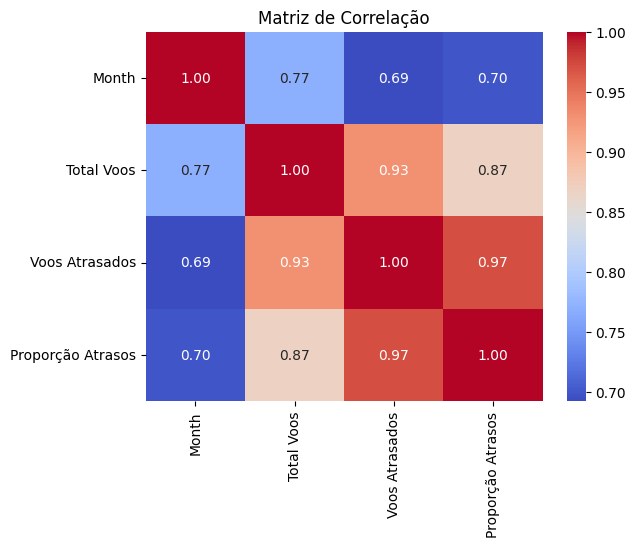

In [ ]:
# Calculando a matriz de correlação
resultado_novo = resultado.reset_index()

correlation_matrix = resultado_novo.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Com essa visualização, conseguimos identificar diversas correlações, com destaque a "Total de voos" x "Voos atrasados", e "Proporção de atrasos" x "Total de voos".

Analisando e testando com mais detalhes a Proporção de Atraso por mês:

<ipython-input-132-a483f7fd429c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Proporção Atrasos', data=resultado_novo, palette='coolwarm')


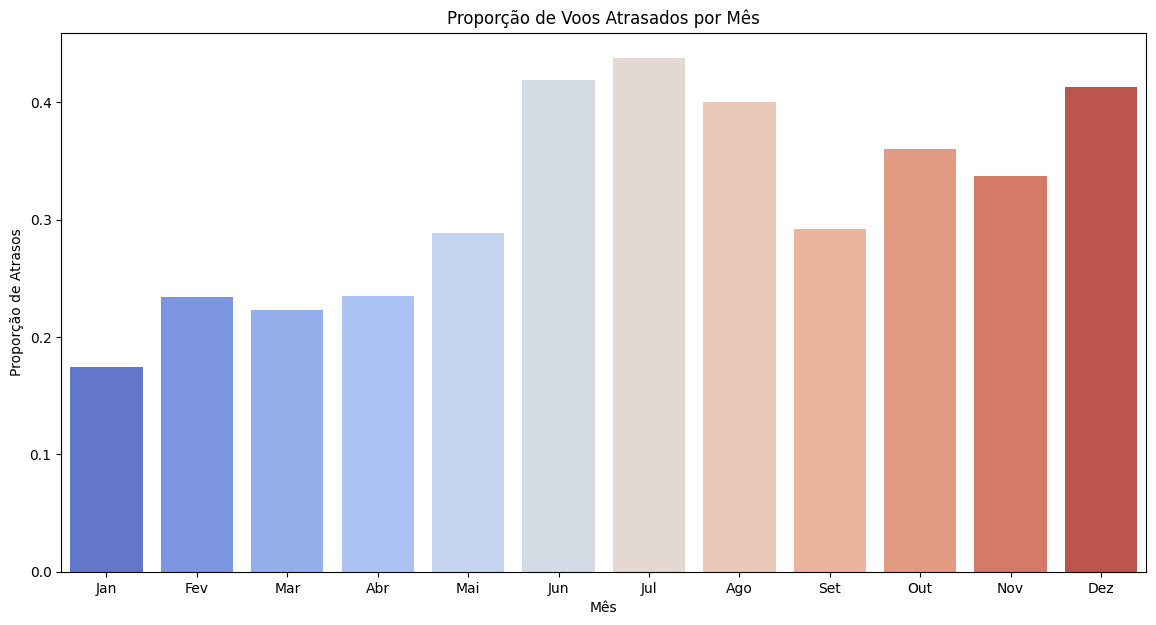

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Proporção Atrasos', data=resultado_novo, palette='coolwarm')
plt.title('Proporção de Voos Atrasados por Mês')
plt.xlabel('Mês')
plt.ylabel('Proporção de Atrasos')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])  # Adicionar nomes de meses para clareza
plt.show()


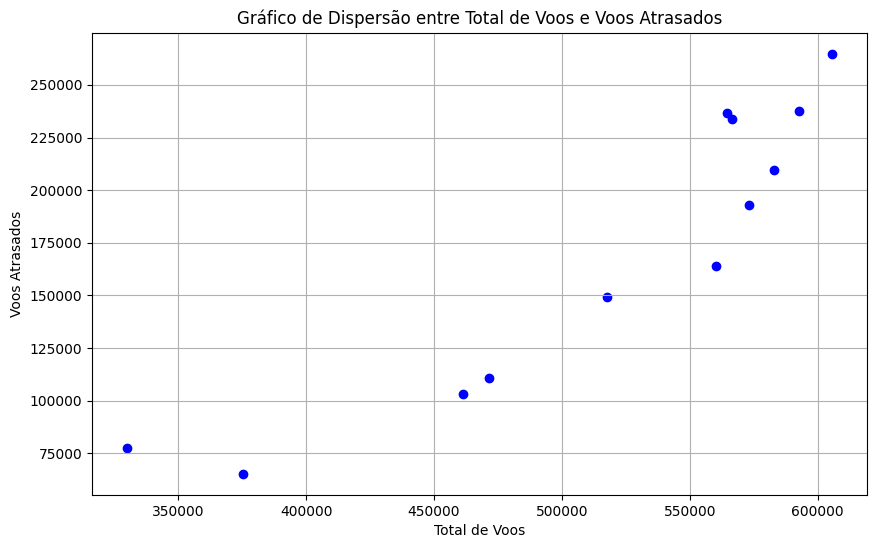

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(resultado['Total Voos'], resultado['Voos Atrasados'], color='blue')
plt.title('Gráfico de Dispersão entre Total de Voos e Voos Atrasados')
plt.xlabel('Total de Voos')
plt.ylabel('Voos Atrasados')
plt.grid(True)
plt.show()

In [ ]:
# Matriz de correlação Total Voos x Proporção de atraso:

In [ ]:
df_correlacao = resultado_novo[["Total Voos", "Proporção Atrasos"]]
df_correlacao.corr(method='spearman')

,Total Voos,Proporção Atrasos
Total Voos,1.000000,0.867133
Proporção Atrasos,0.867133,1.000000


In [ ]:
# Resultado da correlação de Spearman = 0.867133

Sendo assim, temos certeza de que a alta quantidade de voos implica em mais atrasos. Considerando que meses de alta temporada possuem mais voos, consequentemente possuem mais atrasos, mesmo que proporcionalmente, em virtude do aumento da demanda.

# Teste de Hipótese

Para o teste de hipótese, queremos confirmar Formalmente a Correlação entre Voos atrasados e Meses de alta temporada.

Utilizaremos o teste de correlação de Spearman. Este é um teste não paramétrico que mede a força e a direção da associação entre duas variáveis ranqueadas.

Este teste avalia se as diferenças observadas nas medianas dos grupos são grandes o suficiente para serem consideradas estatisticamente significativas, ou se elas poderiam ter ocorrido ao acaso.

Assim, veremos se as variações nas proporções de atrasos ao longo dos meses são consistentes ou se algumas flutuações específicas indicam mudanças significativas.

**Hipótese Nula (H0)**: Não existe correlação entre o total de voos e a proporção de voos atrasados.

**Hipótese Alternativa (H1)**: Existe uma correlação entre o total de voos e a proporção de voos atrasados.


Se o p-valor > 0.05: Aceitamos a hipótese nula (H0), indicando que não há evidência estatística suficiente para afirmar que existe uma correlação entre o total de voos e a proporção de voos atrasados.

Se o p-valor < 0.05: Rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1), sugerindo que existe uma correlação estatística significativa entre o total de voos e a proporção de voos atrasados.


In [ ]:
from scipy.stats import spearmanr

# Spearman's correlation test
correlation, p_value = spearmanr(resultado_novo['Total Voos'], resultado_novo['Proporção Atrasos'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman Correlation Coefficient: 0.8671328671328673
P-value: 0.00025981184986148103


In [ ]:
# Hipotese nula rejeitada, Hipotese alternativa Aceita

# Discretização

In [ ]:
# Definindo os intervalos de atraso
bins = [-1, 0, 30, 60, float('inf')]
labels = ['Sem Atraso', 'Atraso Leve', 'Atraso Moderado', 'Atraso Grave']

df_voos_realizados['CategoriaAtraso'] = pd.cut(df_voos_realizados['DepDelayMinutes'], bins=bins, labels=labels)

df_voos_realizados.head(5)

<ipython-input-19-ce80ee31db02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados['CategoriaAtraso'] = pd.cut(df_voos_realizados['DepDelayMinutes'], bins=bins, labels=labels)


,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,CategoriaAtraso
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,Sem Atraso
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,Sem Atraso
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,Sem Atraso
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,Sem Atraso
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,Sem Atraso


# Inputação de dados ausentes

Como nosso dataset não possui dados "sujos" ou ausentes, resolvemos extrair uma amostra dos dados, apagar aleatoriamente 15% dos valores de "DepDelayMinutes", e inputa-los utilizando o KNN. A razão por utilizar uma amostra dos dados se resume à capacidade computacional, visto que nosso dataset de atrasos possui aproximadamente 6.000.000 milhões de linhas, assim, inputar 15% disso seria custoso para o limite de memória disponível no Colab.



Deste modo, com a discretização feita, nossa seleção de dados se baseará na "categoria de atraso" para garantir que a distribuição dos atrasos seja representativa na amostra.

In [ ]:
# Normalizar colunas para utilizar o KNN

Mesmo tratando-se de variáveis categóricas, há um relação previamente explorada entre essas colunas. Então optamos por normalizar os dados dessa coluna para a inputação com knn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_voos_realizados[['Month']] = scaler.fit_transform(df_voos_realizados[['Month']])
df_voos_realizados[['DayOfWeek']] = scaler.fit_transform(df_voos_realizados[['DayOfWeek']])
df_voos_realizados[['DayofMonth']] = scaler.fit_transform(df_voos_realizados[['DayOfWeek']])
df_voos_realizados[['DepDelayMinutes']] = scaler.fit_transform(df_voos_realizados[['DepDelayMinutes']])

In [ ]:
df_voos_realizados.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed,Atrasado,CategoriaAtraso
0,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,False,False,Sem Atraso
1,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,False,False,Sem Atraso
2,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,False,False,Sem Atraso
3,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,False,False,Sem Atraso
4,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,False,False,Sem Atraso


In [ ]:
# Separando amostra estratificada com base na categoria de atraso

In [ ]:
grouped = df_voos_realizados.groupby('CategoriaAtraso', group_keys=False)
sampled_df = grouped.apply(lambda x: x.sample(min(len(x), int(1000 * (len(x) / len(df_voos_realizados)))), random_state=42))

In [ ]:
sampled_df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed,Atrasado,CategoriaAtraso
2087019,United Air Lines Inc.,2021-11-14,0.909091,1.000000,1.000000,IAH,"Houston, TX",RSW,"Fort Myers, FL",0.0,False,False,Sem Atraso
6150102,JetBlue Airways,2021-06-03,0.454545,0.500000,0.500000,BOS,"Boston, MA",LGA,"New York, NY",0.0,False,False,Sem Atraso
5949981,Frontier Airlines Inc.,2021-06-15,0.454545,0.166667,0.166667,PDX,"Portland, OR",DEN,"Denver, CO",0.0,False,False,Sem Atraso
588810,Republic Airlines,2021-12-10,1.000000,0.666667,0.666667,DCA,"Washington, DC",MSY,"New Orleans, LA",0.0,False,False,Sem Atraso
3256486,SkyWest Airlines Inc.,2021-08-27,0.636364,0.666667,0.666667,SJT,"San Angelo, TX",IAH,"Houston, TX",0.0,False,False,Sem Atraso


In [ ]:
sampled_df.describe()

,FlightDate,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,998,998.000000,998.000000,998.000000,998.000000
mean,2021-07-14 07:09:58.797595136,0.539625,0.514028,0.514028,0.023565
min,2021-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2021-04-19 06:00:00,0.272727,0.166667,0.166667,0.000000
50%,2021-07-20 00:00:00,0.545455,0.500000,0.500000,0.000000
75%,2021-10-12 00:00:00,0.818182,0.833333,0.833333,0.012000
max,2021-12-31 00:00:00,1.000000,1.000000,1.000000,0.710000
std,NaN,0.303524,0.333205,0.333205,0.070669


In [ ]:
# Removendo 15% dos dados "DepDelayMinutes" de forma aleatória

In [ ]:
num_rows = sampled_df.shape[0]
num_to_remove = int(num_rows * 0.15)

np.random.seed(42)
indices_to_remove = np.random.choice(sampled_df.index, num_to_remove, replace=False)

# Definindo 15% dos valores de 'DepDelayMinutes' como NaN
sampled_df.loc[indices_to_remove, 'DepDelayMinutes'] = np.nan

In [ ]:
# Verificando dados nulos em DepDelayMinutes

In [ ]:
sampled_df.isnull().sum()

Airline              0
FlightDate           0
Month                0
DayofMonth           0
DayOfWeek            0
Origin               0
OriginCityName       0
Dest                 0
DestCityName         0
DepDelayMinutes    149
IsDelayed            0
Atrasado             0
CategoriaAtraso      0
dtype: int64

In [ ]:
# Inputando dados com o KNN

Utilizaremos as colunas que possuem relação com os atrasos. São elas: Month, DayofMonth e DayOfWeek.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# só colunas numéricas
columns = sampled_df.select_dtypes(include=[np.number]).columns
sampled_df[columns] = imputer.fit_transform(sampled_df[columns])


In [ ]:
# Verificando se os valores foram adicionados

In [ ]:
sampled_df.isnull().sum()

Airline            0
FlightDate         0
Month              0
DayofMonth         0
DayOfWeek          0
Origin             0
OriginCityName     0
Dest               0
DestCityName       0
DepDelayMinutes    0
IsDelayed          0
Atrasado           0
CategoriaAtraso    0
dtype: int64

In [ ]:
# Comparando com as medidas antigas

In [ ]:
# Medidas antes da inputação:

# Média: 0.023565
# Mediana: 0.0
# Desvio padrão: 0.070669

media = sampled_df["DepDelayMinutes"].mean()
mediana = sampled_df["DepDelayMinutes"].median()
dp = sampled_df["DepDelayMinutes"].std()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio padrão: {dp}")

Média: 0.022034869739478963
Mediana: 0.0
Desvio padrão: 0.06351747819807549


Mediana continuou igual, média praticamente não mudou, e desvio padrão variou em aproximadamente 0.006

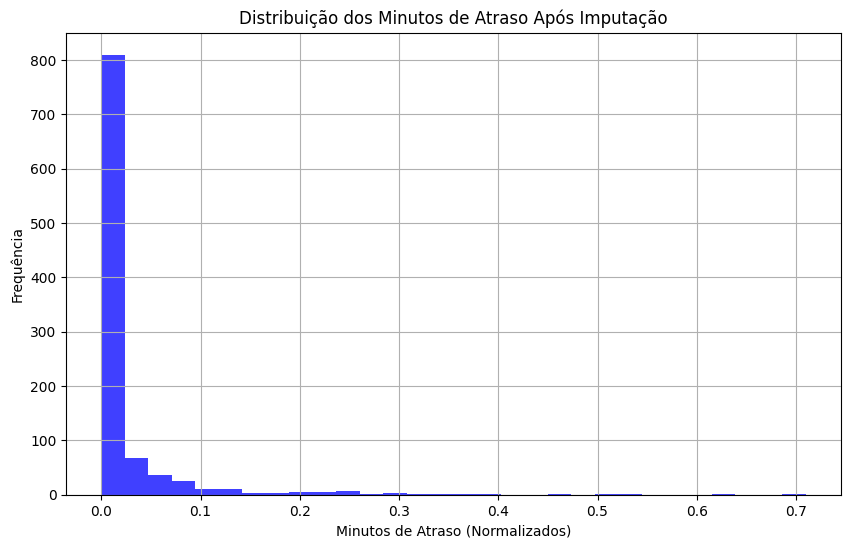

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(sampled_df['DepDelayMinutes'], bins=30, alpha=0.75, color='blue')
plt.title('Distribuição dos Minutos de Atraso Após Imputação')
plt.xlabel('Minutos de Atraso (Normalizados)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
# Com o histograma da amostra inputada com KNN, conseguimos analisar uma incrível semelhança com a distribuição dos dados pré-inputação

# Projeto 2

In [ ]:
# Início do projeto 2

# Filtragem de rotas

Na segunda parte do projeto, iremos
utilizar Regressão para predição do tempo de atraso dos voos. Para isso, analisaremos as rotas mais comuns de voos.

In [102]:
voos_por_origem_dest = df_voos_realizados.groupby(['Origin', 'Dest']).size().reset_index(name='Count')

voos_por_origem_dest = voos_por_origem_dest.sort_values(by='Count', ascending=False)

In [103]:
voos_por_origem_dest.head(30)

,Origin,Dest,Count
6244,SFO,LAX,8632
3602,LAX,SFO,8479
2721,HNL,OGG,7876
4612,OGG,HNL,7788
3554,LAX,LAS,7735
3432,LAS,LAX,7606
5030,PDX,SEA,6993
6102,SEA,PDX,6893
3292,JFK,LAX,6484
3552,LAX,JFK,6471


Assim, selecionamos as rotas
Los angeles(LAX) --> São francisco(SFO)
Orlando(MCO) --> Atlanta(ATL)
Denver(DEN) --> Phoenix(PHX)
Atlanta(ATL) --> Florida (FFL)
Seatle(SEA) --> Portland(PDX)
Salt lake city(SLC) --> Denver(DEN)
New York(JFK) --> Los angeles(LAX)

In [72]:
df_selected_routes = df_voos_realizados[
    ((df_voos_realizados['Origin'] == 'LAX') & (df_voos_realizados['Dest'] == 'SFO')) |
    ((df_voos_realizados['Origin'] == 'MCO') & (df_voos_realizados['Dest'] == 'ATL')) |
    ((df_voos_realizados['Origin'] == 'ATL') & (df_voos_realizados['Dest'] == 'FLL')) |
    ((df_voos_realizados['Origin'] == 'JFK') & (df_voos_realizados['Dest'] == 'LAX'))
]

In [73]:
from sklearn.preprocessing import StandardScaler

df_selected_routes = df_selected_routes[df_selected_routes["DepDelayMinutes"] <= 30]

df_voos_realizados = df_voos_realizados[df_voos_realizados["DepDelayMinutes"] <= 30]
bins = [-1, 0, 30]
labels = ['Sem Atraso', 'Atraso Leve']

df_selected_routes['CategoriaAtraso'] = pd.cut(df_selected_routes['DepDelayMinutes'], bins=bins, labels=labels)
df_voos_realizados['CategoriaAtraso'] = pd.cut(df_selected_routes['DepDelayMinutes'], bins=bins, labels=labels)


In [144]:
df_selected_routes.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,CategoriaAtraso
16,SkyWest Airlines Inc.,2021-03-03,3,3,3,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso
32,SkyWest Airlines Inc.,2021-03-03,3,3,3,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso
295,SkyWest Airlines Inc.,2021-03-02,3,2,2,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso
311,SkyWest Airlines Inc.,2021-03-02,3,2,2,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso
539,SkyWest Airlines Inc.,2021-03-18,3,18,4,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0,Sem Atraso


# Treinamento de modelos o com MLflow (Separação de dados)

Para a predição do tempo de atraso, decidimos utilizar Regressão Linear, Random Forest, Árvore de Decisão para Regressão e Gradient Boosting.

In [109]:
!pip install mlflow

In [28]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

mlflow.set_experiment("Flight status prediction")

<Experiment: artifact_location='file:///content/mlruns/453729730531091628', creation_time=1720701243394, experiment_id='453729730531091628', last_update_time=1720701243394, lifecycle_stage='active', name='Flight status prediction', tags={}>

# Treinamento geral dos modelos com MLFlow e seleção de Hiper-parâmetros

Best Logistic Regression model: LogisticRegression(C=10, max_iter=1000)
Validation AUC-ROC for Logistic Regression: 0.653256288643083


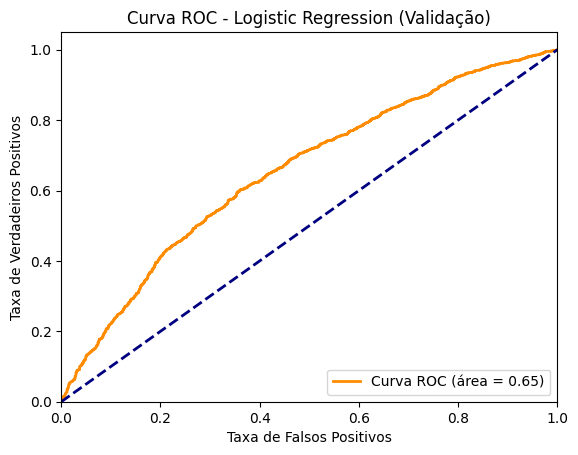

Best Random Forest model: RandomForestClassifier(max_depth=10, n_estimators=200)
Validation AUC-ROC for Random Forest: 0.69461694705627


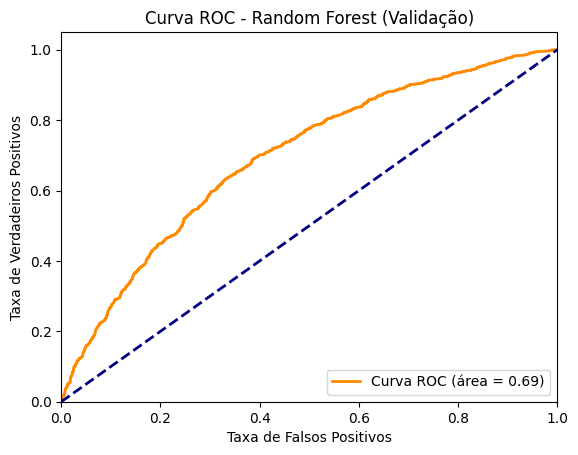

Best Gradient Boosting model: GradientBoostingClassifier(n_estimators=200)
Validation AUC-ROC for Gradient Boosting: 0.7063360223201449


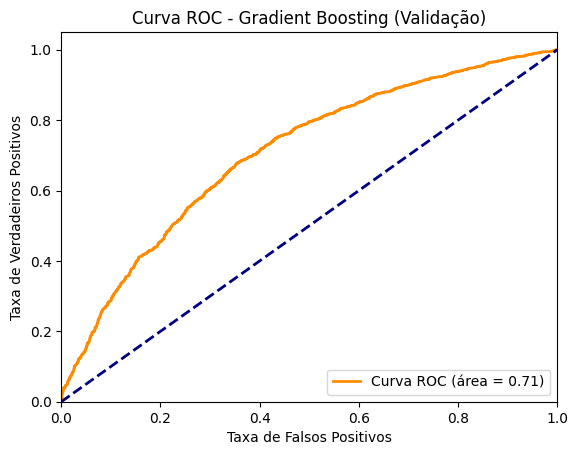

Best XGBoost model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Validation AUC-ROC for XGBoost: 0.7073521640126521


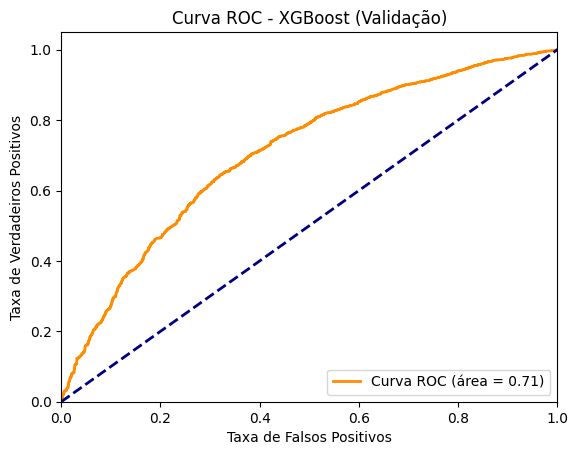

Best Model: XGBoost
Test AUC-ROC: 0.6797263495172148


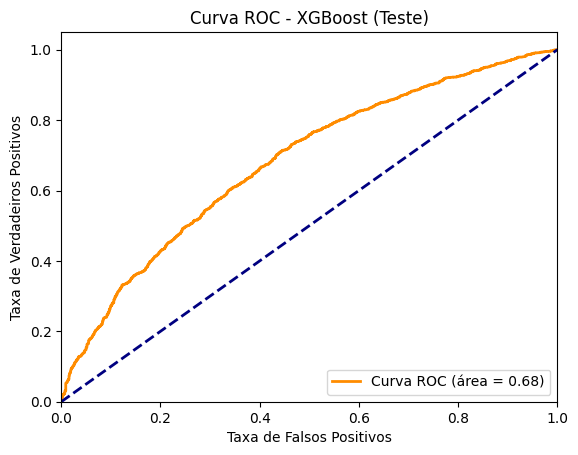

In [119]:
# Normalizar colunas específicas com z-score
cols_to_normalize = ['Month', 'DayofMonth', 'DayOfWeek']
scaler = StandardScaler()
df_selected_routes[cols_to_normalize] = scaler.fit_transform(df_selected_routes[cols_to_normalize])

# Codificar colunas categóricas
df_selected_routes = pd.get_dummies(df_selected_routes, columns=['Airline', 'Origin', 'Dest'], drop_first=True)

# Selecionar features e variável alvo
X = df_selected_routes.drop(columns=['CategoriaAtraso', 'FlightDate', 'OriginCityName', 'DestCityName', 'DepDelayMinutes'])
y = df_selected_routes['CategoriaAtraso']

# Codificar as classes de 'y' como valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento, validação e teste com estratificação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


# Definir hiperparâmetros para GridSearchCV
param_grid_lr = {
    'C': [0.1, 1, 10]
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

param_grid_gb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

# Lista de modelos e seus parâmetros para GridSearchCV
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Gradient Boosting': (GradientBoostingClassifier(), param_grid_gb),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb)
}

best_models = {}

# Função para treinar e logar o modelo com MLflow
def train_and_log_model(model, model_name, param_grid):
    with mlflow.start_run(run_name=model_name):
        skf = StratifiedKFold(n_splits=3)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Avaliação no conjunto de validação
        y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
        val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)
        fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Logar métricas e modelo
        mlflow.log_param("best_params", grid_search.best_params_)
        mlflow.log_metric("validation_auc_roc", val_auc_roc)
        mlflow.sklearn.log_model(best_model, model_name)

        print(f"Best {model_name} model: {best_model}")
        print(f"Validation AUC-ROC for {model_name}: {val_auc_roc}")

        # Plotar a curva ROC para validação
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title(f'Curva ROC - {model_name} (Validação)')
        plt.legend(loc="lower right")
        plt.show()

        return best_model

# Treinar e logar cada modelo
for model_name, (model, param_grid) in models.items():
    best_models[model_name] = train_and_log_model(model, model_name, param_grid)

# Selecionar o melhor modelo com base na AUC-ROC de validação
best_model_name = max(best_models, key=lambda name: roc_auc_score(y_val, best_models[name].predict_proba(X_val)[:, 1]))
best_model = best_models[best_model_name]

# Avaliar o melhor modelo no conjunto de teste
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Logar o melhor modelo no MLflow com avaliação no conjunto de teste
with mlflow.start_run(run_name=f"Best Model - {best_model_name}"):
    mlflow.sklearn.log_model(best_model, best_model_name)
    mlflow.log_metric("test_auc_roc", test_auc_roc)

    print(f"Best Model: {best_model_name}")
    print(f"Test AUC-ROC: {test_auc_roc}")

    # Plotar a curva ROC para o conjunto de teste
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC - {best_model_name} (Teste)')
    plt.legend(loc="lower right")
    plt.show()

Assim, temos como melhor modelo geral na métrica de avaliação o Gradient Boosting.

# Aprimorando o melhor modelo

Inicialmente, tentaremos a inclusão de novas features para corrigir a precisão do modelo.

Adicionando novas features ao modelo e implementando cross-validation no conjunto de treinamento



In [164]:
df_voos_realizados['ProporcaoAtrasosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform(lambda x: (x == 'Atraso Leve').mean())
df_voos_realizados['TotalAtrasosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform(lambda x: (x == 'Atraso Leve').sum())
df_voos_realizados['TotalVoosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform('count')
df_voos_realizados['AltaTemporada'] = df_voos_realizados['Month'].apply(lambda x: 1 if x in [6, 7, 12] else 0)
mean_delay_by_airline = df_voos_realizados.groupby('Airline')['DepDelayMinutes'].mean().to_dict()
df_voos_realizados['MediaAtrasoAirline'] = df_voos_realizados['Airline'].map(mean_delay_by_airline)

# Selecionar as colunas necessárias para o mapeamento
df_features = df_voos_realizados[['Month', 'Airline', 'ProporcaoAtrasosMes', 'TotalAtrasosMes', 'TotalVoosMes', 'AltaTemporada', 'MediaAtrasoAirline']].drop_duplicates()

# Realizar o mapeamento
df_selected_routes = df_selected_routes.merge(df_features, on=['Month', 'Airline'], how='left')

# Normalizar colunas específicas
cols_to_normalize = ['Month', 'DayofMonth', 'DayOfWeek', 'ProporcaoAtrasosMes', 'TotalAtrasosMes', 'TotalVoosMes', 'MediaAtrasoAirline']
scaler = StandardScaler()
df_selected_routes[cols_to_normalize] = scaler.fit_transform(df_selected_routes[cols_to_normalize])

# Codificar variáveis categóricas
df_selected_routes = pd.get_dummies(df_selected_routes, columns=['Airline', 'Origin', 'Dest'], drop_first=True)


Validation AUC-ROC for XGBoost: 0.7057079074198049
              precision    recall  f1-score   support

           0       0.51      0.45      0.48      1218
           1       0.78      0.82      0.80      2958

    accuracy                           0.71      4176
   macro avg       0.65      0.64      0.64      4176
weighted avg       0.70      0.71      0.71      4176

Test AUC-ROC for XGBoost: 0.6774031848173276
              precision    recall  f1-score   support

           0       0.47      0.42      0.45      1218
           1       0.77      0.81      0.79      2958

    accuracy                           0.69      4176
   macro avg       0.62      0.61      0.62      4176
weighted avg       0.68      0.69      0.69      4176



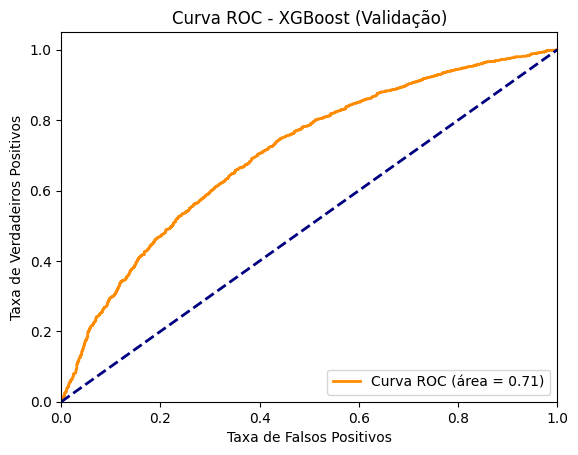

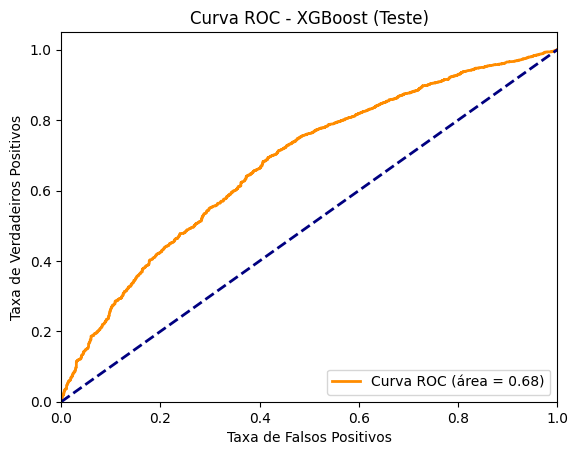

In [166]:
# Selecionar features e variável alvo
X = df_selected_routes.drop(columns=['CategoriaAtraso', 'FlightDate', 'OriginCityName', 'DestCityName', 'DepDelayMinutes'])
y = df_selected_routes['CategoriaAtraso']

# Codificar as classes de 'y' como valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento, validação e teste com estratificação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Treinar o melhor modelo XGBoost
best_xgb_model = XGBClassifier(eval_metric='logloss', learning_rate=0.1, max_depth=5, n_estimators=100)

best_xgb_model.fit(X_train, y_train)

# Avaliar o modelo no conjunto de validação
y_val_pred = best_xgb_model.predict(X_val)
val_roc_auc = roc_auc_score(y_val, best_xgb_model.predict_proba(X_val)[:, 1])
print(f'Validation AUC-ROC for XGBoost: {val_roc_auc}')
print(classification_report(y_val, y_val_pred))

# Avaliar o modelo no conjunto de teste
y_test_pred = best_xgb_model.predict(X_test)
test_roc_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC for XGBoost: {test_roc_auc}')
print(classification_report(y_test, y_test_pred))

# Plotar a curva ROC para o conjunto de validação
fpr, tpr, _ = roc_curve(y_val, best_xgb_model.predict_proba(X_val)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % val_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title(f'Curva ROC - XGBoost (Validação)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de teste
fpr, tpr, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title(f'Curva ROC - XGBoost (Teste)')
plt.legend(loc="lower right")
plt.show()


# Staking

Validation AUC-ROC: 0.6915060713147724
Test AUC-ROC: 0.6661881558013614


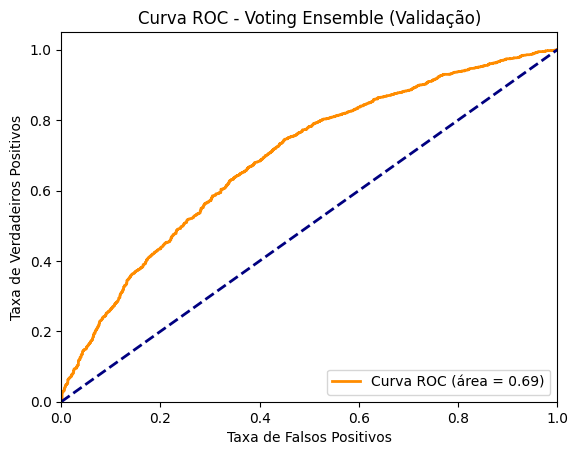

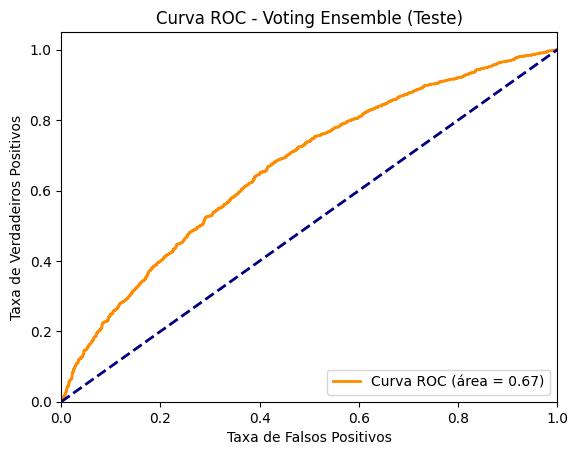

Ensemble Validation AUC-ROC: 0.6915060713147724
Ensemble Test AUC-ROC: 0.6661881558013614


In [183]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

# Função para treinar e avaliar modelos com ROC-AUC
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_auc_roc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    print(f"Validation AUC-ROC: {val_auc_roc}")

    y_test_pred = model.predict(X_test)
    test_auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Test AUC-ROC: {test_auc_roc}")

    return val_auc_roc, test_auc_roc

# Função para plotar a curva ROC
def plot_roc_curve(model, X_val, y_val, title):
    y_val_prob = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc_score(y_val, y_val_prob))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Calcular as features no dataset df_voos_realizado
df_voos_realizados['ProporcaoAtrasosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform(lambda x: (x == 'Atraso Leve').mean())
df_voos_realizados['TotalAtrasosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform(lambda x: (x == 'Atraso Leve').sum())
df_voos_realizados['TotalVoosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform('count')
df_voos_realizados['AltaTemporada'] = df_voos_realizados['Month'].apply(lambda x: 1 if x in [6, 7, 12] else 0)
mean_delay_by_airline = df_voos_realizados.groupby('Airline')['DepDelayMinutes'].mean().to_dict()
df_voos_realizados['MediaAtrasoAirline'] = df_voos_realizados['Airline'].map(mean_delay_by_airline)

# Selecionar as colunas necessárias para o mapeamento
df_features = df_voos_realizados[['Month', 'Airline', 'ProporcaoAtrasosMes', 'TotalAtrasosMes', 'TotalVoosMes', 'AltaTemporada', 'MediaAtrasoAirline']].drop_duplicates()

# Realizar o mapeamento
df_selected_routes = df_selected_routes.merge(df_features, on=['Month', 'Airline'], how='left')

# Normalizar colunas específicas
cols_to_normalize = ['Month', 'DayofMonth', 'DayOfWeek', 'ProporcaoAtrasosMes', 'TotalAtrasosMes', 'TotalVoosMes', 'MediaAtrasoAirline']
scaler = StandardScaler()
df_selected_routes[cols_to_normalize] = scaler.fit_transform(df_selected_routes[cols_to_normalize])

# Codificar variáveis categóricas
df_selected_routes = pd.get_dummies(df_selected_routes, columns=['Airline', 'Origin', 'Dest'], drop_first=True)

# Selecionar features e variável alvo
X = df_selected_routes.drop(columns=['CategoriaAtraso', 'FlightDate', 'OriginCityName', 'DestCityName', 'DepDelayMinutes'])
y = df_selected_routes['CategoriaAtraso']

# Codificar as classes de 'y' como valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Modelos para ensemble
models = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Ensemble com VotingClassifier
ensemble_model = VotingClassifier(estimators=models, voting='soft')

# Treinar e avaliar o ensemble
val_auc_roc, test_auc_roc = train_and_evaluate_model(ensemble_model, X_train_smote, y_train_smote, X_val, y_val, X_test, y_test)

# Plotar a curva ROC para validação e teste
plot_roc_curve(ensemble_model, X_val, y_val, "Curva ROC - Voting Ensemble (Validação)")
plot_roc_curve(ensemble_model, X_test, y_test, "Curva ROC - Voting Ensemble (Teste)")

print(f"Ensemble Validation AUC-ROC: {val_auc_roc}")
print(f"Ensemble Test AUC-ROC: {test_auc_roc}")


# Novos ajustes

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features: Index(['Month', 'DayOfWeek', 'ProporcaoAtrasosMes', 'TotalAtrasosMes',
       'MediaAtrasoAirline', 'Dest_FLL'],
      dtype='object')
Validation AUC-ROC for XGBoost: 0.6301313628899835
              precision    recall  f1-score   support

           0       0.50      0.44      0.47      1218
           1       0.78      0.82      0.80      2958

    accuracy                           0.71      4176
   macro avg       0.64      0.63      0.63      4176
weighted avg       0.70      0.71      0.70      4176

Test AUC-ROC for XGBoost: 0.612093113107312
              precision    recall  f1-score   support

           0       0.47      0.42      0.44      1218
           1       0.77      0.80      0.79      2958

    accuracy                           0.69      4176
   macro avg       0.62      0.61      0.61      4176
weighted avg       0.68      0.69      0.69      4176



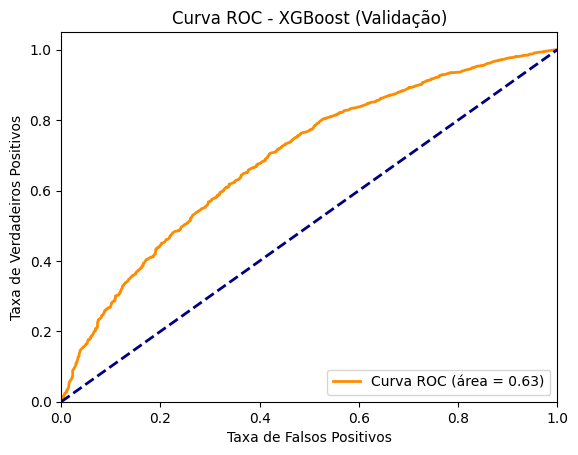

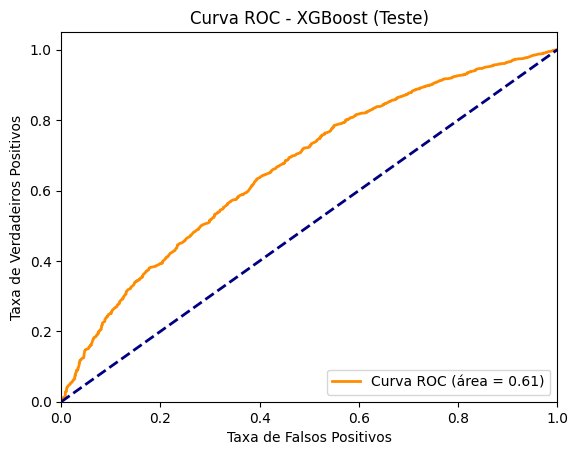

In [74]:
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score

# Calcular as features no dataset df_voos_realizado
df_voos_realizados['ProporcaoAtrasosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform(lambda x: (x == 'Atraso Leve').mean())
df_voos_realizados['TotalAtrasosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform(lambda x: (x == 'Atraso Leve').sum())
df_voos_realizados['TotalVoosMes'] = df_voos_realizados.groupby('Month')['CategoriaAtraso'].transform('count')
df_voos_realizados['AltaTemporada'] = df_voos_realizados['Month'].apply(lambda x: 1 if x in [6, 7, 12] else 0)
mean_delay_by_airline = df_voos_realizados.groupby('Airline')['DepDelayMinutes'].mean().to_dict()
df_voos_realizados['MediaAtrasoAirline'] = df_voos_realizados['Airline'].map(mean_delay_by_airline)

# Selecionar as colunas necessárias para o mapeamento
df_features = df_voos_realizados[['Month', 'Airline', 'ProporcaoAtrasosMes', 'TotalAtrasosMes', 'TotalVoosMes', 'AltaTemporada', 'MediaAtrasoAirline']].drop_duplicates()

# Realizar o mapeamento
df_selected_routes = df_selected_routes.merge(df_features, on=['Month', 'Airline'], how='left')

df_selected_routes = pd.get_dummies(df_selected_routes, columns=['Origin', 'Dest'], drop_first=True)

# Normalizar colunas específicas
cols_to_normalize = ['Month', 'DayofMonth', 'DayOfWeek', 'ProporcaoAtrasosMes', 'TotalAtrasosMes', 'TotalVoosMes', 'MediaAtrasoAirline']
scaler = StandardScaler()
df_selected_routes[cols_to_normalize] = scaler.fit_transform(df_selected_routes[cols_to_normalize])


# Selecionar features e variável alvo
X = df_selected_routes.drop(columns=['Airline', 'CategoriaAtraso', 'FlightDate', 'OriginCityName', 'DestCityName', 'DepDelayMinutes'])
y = df_selected_routes['CategoriaAtraso']

# Codificar as classes de 'y' como valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Dividir os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Seleção de features usando XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train_smote, y_train_smote)
selector = SelectFromModel(xgb_model, prefit=True)
X_train_selected = selector.transform(X_train_smote)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Verificar as features selecionadas
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

# Treinar o modelo XGBoost com as features selecionadas
best_xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
best_xgb_model.fit(X_train_selected, y_train_smote)

# Avaliar o modelo no conjunto de validação
y_val_pred = best_xgb_model.predict(X_val_selected)
val_auc_roc = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC-ROC for XGBoost: {val_auc_roc}")
print(classification_report(y_val, y_val_pred))

# Avaliar o modelo no conjunto de teste
y_test_pred = best_xgb_model.predict(X_test_selected)
test_auc_roc = roc_auc_score(y_test, y_test_pred)
print(f"Test AUC-ROC for XGBoost: {test_auc_roc}")
print(classification_report(y_test, y_test_pred))

# Plotar a curva ROC para o conjunto de validação
fpr, tpr, _ = roc_curve(y_val, best_xgb_model.predict_proba(X_val_selected)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {val_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Validação)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de teste
fpr, tpr, _ = roc_curve(y_test, best_xgb_model.predict_proba(X_test_selected)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {test_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - XGBoost (Teste)')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation AUC-ROC for Bagging with XGBoost: 0.6257847966772916
              precision    recall  f1-score   support

           0       0.50      0.43      0.46      1218
           1       0.78      0.82      0.80      2958

    accuracy                           0.71      4176
   macro avg       0.64      0.63      0.63      4176
weighted avg       0.70      0.71      0.70      4176

Test AUC-ROC for Bagging with XGBoost: 0.6066840529315175
              precision    recall  f1-score   support

           0       0.46      0.41      0.43      1218
           1       0.77      0.81      0.79      2958

    accuracy                           0.69      4176
   macro avg       0.62      0.61      0.61      4176
weighted avg       0.68      0.69      0.68      4176



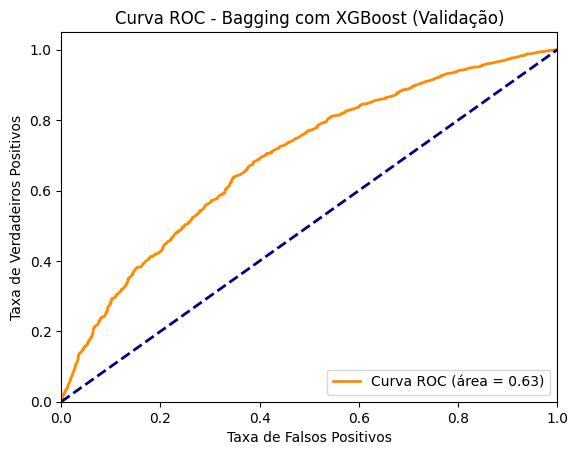

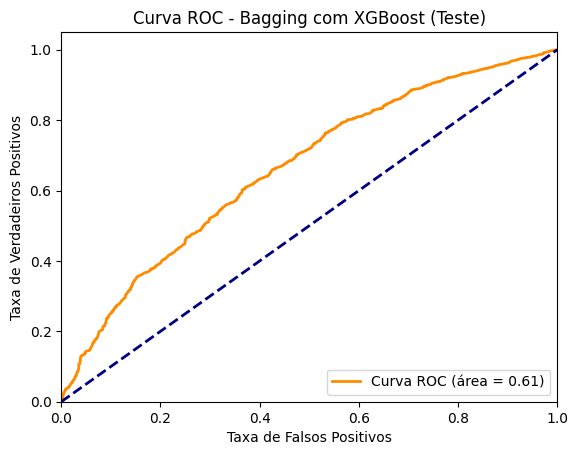

In [75]:
# Bagging com XGBoost
bagging_model = BaggingClassifier(base_estimator=XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1),
                                  n_estimators=10, random_state=42)
bagging_model.fit(X_train_selected, y_train_smote)

# Avaliar o modelo no conjunto de validação
y_val_pred = bagging_model.predict(X_val_selected)
val_auc_roc = roc_auc_score(y_val, y_val_pred)
print(f"Validation AUC-ROC for Bagging with XGBoost: {val_auc_roc}")
print(classification_report(y_val, y_val_pred))

# Avaliar o modelo no conjunto de teste
y_test_pred = bagging_model.predict(X_test_selected)
test_auc_roc = roc_auc_score(y_test, y_test_pred)
print(f"Test AUC-ROC for Bagging with XGBoost: {test_auc_roc}")
print(classification_report(y_test, y_test_pred))

# Plotar a curva ROC para o conjunto de validação
fpr, tpr, _ = roc_curve(y_val, bagging_model.predict_proba(X_val_selected)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {val_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Bagging com XGBoost (Validação)')
plt.legend(loc="lower right")
plt.show()

# Plotar a curva ROC para o conjunto de teste
fpr, tpr, _ = roc_curve(y_test, bagging_model.predict_proba(X_test_selected)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {test_auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Bagging com XGBoost (Teste)')
plt.legend(loc="lower right")
plt.show()
